In [10]:
import heapq

In [11]:
class PriorityQueue:
    def __init__(self):
        self.elements = []

    def enqueue(self, item, priority):
        heapq.heappush(self.elements, (priority, item))

    def dequeue(self):
        return heapq.heappop(self.elements)[1]

    def is_empty(self):
        return len(self.elements) == 0

In [12]:
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)
    path.reverse()
    return path

In [13]:
def greedy_best_first_search(grid, start, goal, heuristic_func):
    pq = PriorityQueue()
    pq.enqueue(start, heuristic_func(start, goal))
    came_from = {start: None}
    visited = set()

    while not pq.is_empty():
        current = pq.dequeue()

        if current == goal:
            return reconstruct_path(came_from, start, goal)

        visited.add(current)

        for neighbor in neighbors(grid, current):
            if neighbor not in visited:
                visited.add(neighbor)
                priority = heuristic_func(neighbor, goal)
                pq.enqueue(neighbor, priority)
                came_from[neighbor] = current

    return None

In [14]:
def neighbors(grid, node):
    rows, cols = len(grid), len(grid[0])
    x, y = node
    possible_moves = [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)]
    return [
        (nx, ny)
        for nx, ny in possible_moves
        if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] != 0
    ]

In [15]:
def manhattan_distance(node, goal):
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

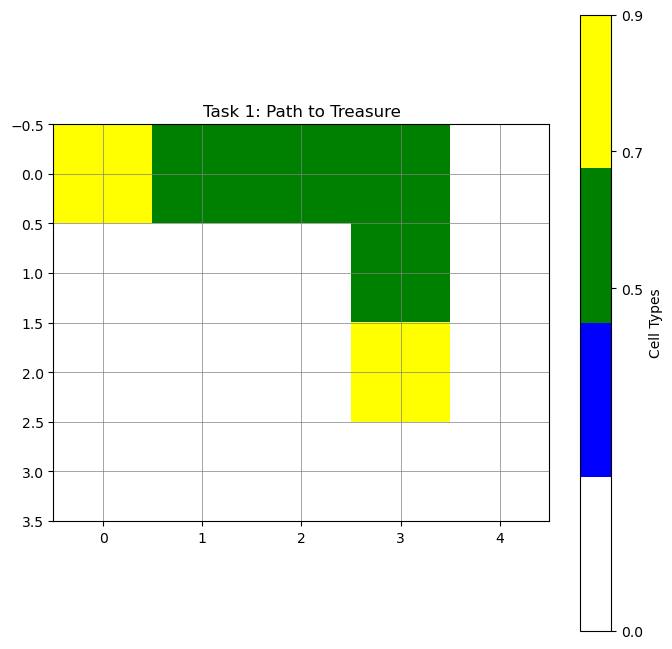

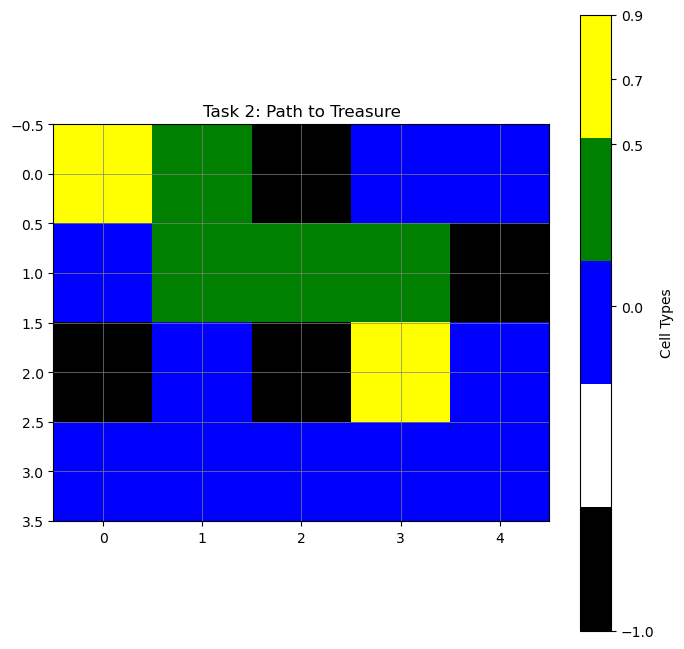

In [17]:
def visualize_task1(grid, start, goal, path):
    rows, cols = len(grid), len(grid[0])
    visual_grid = np.zeros((rows, cols))

    for cell in path:
        visual_grid[cell[0]][cell[1]] = 0.5 

    visual_grid[start[0]][start[1]] = 0.7  
    visual_grid[goal[0]][goal[1]] = 0.9  

    cmap = ListedColormap(["white", "blue", "green", "yellow"])
    plt.figure(figsize=(8, 8))
    plt.imshow(visual_grid, cmap=cmap, origin='upper')
    plt.colorbar(ticks=[0, 0.5, 0.7, 0.9], label='Cell Types')
    plt.title("Task 1: Path to Treasure")
    plt.grid(color='gray', linestyle='-', linewidth=0.5)
    plt.show()

def visualize_task2(grid, start, goal, path):
    rows, cols = len(grid), len(grid[0])
    visual_grid = np.zeros((rows, cols))

    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 0:
                visual_grid[r][c] = -1  
            else:
                visual_grid[r][c] = 0 

    for cell in path:
        visual_grid[cell[0]][cell[1]] = 0.5  

    visual_grid[start[0]][start[1]] = 0.7  
    visual_grid[goal[0]][goal[1]] = 0.9  

    cmap = ListedColormap(["black", "white", "blue", "green", "yellow"])
    plt.figure(figsize=(8, 8))
    plt.imshow(visual_grid, cmap=cmap, origin='upper')
    plt.colorbar(ticks=[-1, 0, 0.5, 0.7, 0.9], label='Cell Types')
    plt.title("Task 2: Path to Treasure")
    plt.grid(color='gray', linestyle='-', linewidth=0.5)
    plt.show()

grid_task1 = [
    [7, 5, 3, 2, 4],
    [8, 5, 5, 2, 2],
    [5, 6, 2, 1, 3],
    [4, 3, 3, 2, 5],
]
start_task1 = (0, 0)
goal_task1 = (2, 3)
path_task1 = greedy_best_first_search(grid_task1, start_task1, goal_task1, manhattan_distance)
visualize_task1(grid_task1, start_task1, goal_task1, path_task1)

grid_task2 = [
    [1, 1, 0, 1, 1],
    [1, 1, 1, 1, 0],
    [0, 1, 0, 1, 1],
    [1, 1, 1, 1, 1],
]
start_task2 = (0, 0)
goal_task2 = (2, 3)
path_task2 = greedy_best_first_search(grid_task2, start_task2, goal_task2, manhattan_distance)
visualize_task2(grid_task2, start_task2, goal_task2, path_task2)